In [7]:
import soundfile as sf
import librosa
from os import listdir
import matplotlib.pyplot as plt
import numpy as np
import keras


In [8]:
#Carga los datos del train
lista_hombres_train = []
for archivo in listdir('./train/hombres/'):
    a = librosa.core.load('./train/hombres/'+archivo)
    lista_hombres_train.append(a[0])
#ENDFOR
         
lista_mujeres_train = []
for archivo in listdir('./train/mujeres/'):
    a = librosa.core.load('./train/mujeres/'+archivo)
    lista_mujeres_train.append(a[0])
#ENDFOR
#Carga los datos del test

lista_hombres_test = []
for archivo in listdir('./test/hombres/'):
    a = librosa.core.load('./test/hombres/'+archivo)
    lista_hombres_test.append(a[0])
#ENDFOR
         
lista_mujeres_test = []
for archivo in listdir('./test/mujeres/'):
    a = librosa.core.load('./test/mujeres/'+archivo)
    lista_mujeres_test.append(a[0])
#ENDFOR

(array([-0.00415723, -0.00684101, -0.00669899, ..., -0.00337526,
       -0.00074263,  0.        ], dtype=float32), 22050)


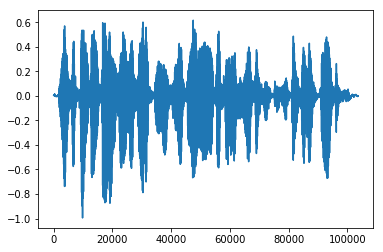

In [9]:
#Se muestra que la carga de audio funcionó
print (a)
plt.plot(lista_hombres_train[-1])
plt.show()

In [10]:
#Calcula el esprectro mel de la señal
def mel_spectrogram(wav, sr, db=True, n_fft=2**10, **kwargs):
    M = librosa.feature.melspectrogram(wav, sr=sr, n_fft=n_fft, **kwargs)
    if db:                                                               
       return librosa.power_to_db(M, ref=np.max)                        
    else:                                                                
       return M     
#ENDDEF


#Crear el espectrograma
def create_mel_spectrogram(wav_file):                        
   #wave, samplerate = read_wav(wav_file)                    
   melspec = mel_spectrogram(wav_file, sr=16000, n_fft=1024)  
   return np.abs(melspec) / np.linalg.norm(np.abs(melspec)) 
#ENDDEF

def plot_matrix(m, message=''): 
   plt.matshow(m)              
   plt.title(message)          
   plt.show()    
#ENDDEF
#plot_matrix(V_p - V, "Difference") 


In [11]:
#Calcula los espectrogramas del train
lista_spec_hombres_train = []
for file in lista_hombres_train:
    a = create_mel_spectrogram(file)
    lista_spec_hombres_train.append(a)
#ENDFOR

lista_spec_mujeres_train = []
for file in lista_mujeres_train:
    a = create_mel_spectrogram(file)
    lista_spec_mujeres_train.append(a)
#ENDFOR

#Calcula los espectrogramas del test
lista_spec_hombres_test = []
for file in lista_hombres_test:
    a = create_mel_spectrogram(file)
    lista_spec_hombres_test.append(a)
#ENDFOR

lista_spec_mujeres_test = []
for file in lista_mujeres_test:
    a = create_mel_spectrogram(file)
    lista_spec_mujeres_test.append(a)
#ENDFOR


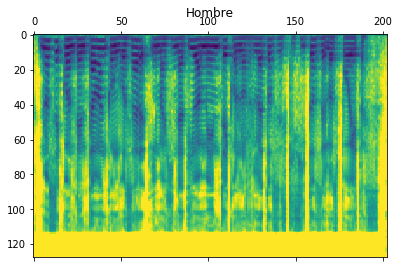

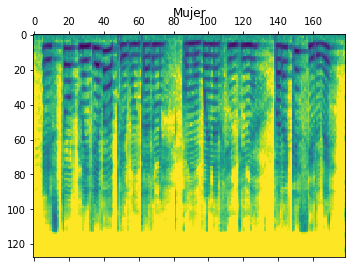

In [12]:
#Se muestra que la carga de audio funcionó
#print (a)
#plt.matshow(lista_spec_hombres_train[-1])
#plt.show()

plot_matrix(lista_spec_hombres_train[-1],"Hombre")
plot_matrix(lista_spec_mujeres_train[-1],"Mujer")

In [13]:
#Hace cortes (segmentos) en el train
x=[]
y=[]
x_test=[]
y_test=[]
lista_segment_hombres_train =[]
for spec in lista_spec_hombres_train:
    for segment in range(0,spec.shape[1]-10,10):
        x.append(spec[:,segment:segment+10].reshape((128,10,1)))
        y.append([1,0])
    #ENDFOR
#ENDFOR

lista_segment_mujeres_train =[]
for spec in lista_spec_mujeres_train:
    for segment in range(0,spec.shape[1]-10,10):
        x.append(spec[:,segment:segment+10].reshape((128,10,1)))
        y.append([0,1])
    #ENDFOR
#ENDFOR

#Hace cortes (segmentos) en el test
lista_segment_hombres_test =[]
for spec in lista_spec_hombres_test:
    for segment in range(0,spec.shape[1]-10,10):
        x_test.append(spec[:,segment:segment+10].reshape((128,10,1)))
        y_test.append([1,0])
    #ENDFOR
#ENDFOR

lista_segment_mujeres_test =[]
for spec in lista_spec_mujeres_test:
    for segment in range(0,spec.shape[1]-10,10):
        x_test.append(spec[:,segment:segment+10].reshape((128,10,1)))
        y_test.append([0,1])
    #ENDFOR
#ENDFOR

In [14]:
#plot_matrix(lista_segment_hombres_train[-1],"Segmento Hombre")
#plot_matrix(lista_segment_mujeres_train[-1],"Segmento Mujer")

In [15]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, Reshape

#Se el objeto para el modelo
model = Sequential()

#Capa convolucional 2D
model.add(Conv2D(24, (3, 3), padding='same',
                 input_shape=(128,10,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
#Capa convolucional 2D
model.add(Conv2D(24, (3, 3), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
#Capa convolucional 2D
#model.add(Conv2D(7, (3, 3), padding='same'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Activation('relu'))
#Capa convolucional 2D
model.add(Conv2D(7, (3, 3), padding='same'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Activation('relu'))
#Hacer el reshape de la ultima convolucional
#(la estiramos)
model.add(Flatten())
#Capa de red neurnal normal
model.add(Dense(30,activation='relu'))
#Salida de la red neuronal
model.add(Dense(2,activation='softmax'))
#Activacion de la salida
#model.add(Activation('softmax'))
#Compilar el modelo, es decir, la red
model.compile(loss='categorical_crossentropy', optimizer='adam')

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 10, 24)       240       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 5, 24)         0         
_________________________________________________________________
activation_1 (Activation)    (None, 64, 5, 24)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 5, 24)         5208      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 2, 24)         0         
_________________________________________________________________
activation_2 (Activation)    (None, 32, 2, 24)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 2, 7)          1519      
__________

In [16]:
#Entrenar
x=np.array(x)
y=np.array(y)
model.fit(x,y,batch_size=100,epochs=100,validation_split=0.1)
#,metrics=['accuracy']

Train on 257 samples, validate on 29 samples
Epoch 1/100
257/257 [==============================] - 1s 3ms/step - loss: 0.6926 - val_loss: 0.7103
Epoch 2/100
257/257 [==============================] - 0s 1ms/step - loss: 0.6916 - val_loss: 0.7426
Epoch 3/100
257/257 [==============================] - 0s 2ms/step - loss: 0.6902 - val_loss: 0.7713
Epoch 4/100
257/257 [==============================] - 0s 2ms/step - loss: 0.6901 - val_loss: 0.7839
Epoch 5/100
257/257 [==============================] - 0s 1ms/step - loss: 0.6903 - val_loss: 0.8002
Epoch 6/100
257/257 [==============================] - 0s 1ms/step - loss: 0.6909 - val_loss: 0.7852
Epoch 7/100
257/257 [==============================] - 0s 2ms/step - loss: 0.6901 - val_loss: 0.7822
Epoch 8/100
257/257 [==============================] - 0s 2ms/step - loss: 0.6902 - val_loss: 0.7791
Epoch 9/100
257/257 [==============================] - 0s 1ms/step - loss: 0.6898 - val_loss: 0.7844
Epoch 10/100
257/257 [========================

Epoch 81/100
257/257 [==============================] - 0s 1ms/step - loss: 0.1847 - val_loss: 0.1179
Epoch 82/100
257/257 [==============================] - 0s 1ms/step - loss: 0.1791 - val_loss: 0.1411
Epoch 83/100
257/257 [==============================] - 0s 1ms/step - loss: 0.1792 - val_loss: 0.1634
Epoch 84/100
257/257 [==============================] - 0s 1ms/step - loss: 0.1684 - val_loss: 0.2085
Epoch 85/100
257/257 [==============================] - 0s 1ms/step - loss: 0.1718 - val_loss: 0.1149
Epoch 86/100
257/257 [==============================] - 0s 1ms/step - loss: 0.1703 - val_loss: 0.2013
Epoch 87/100
257/257 [==============================] - 0s 1ms/step - loss: 0.1820 - val_loss: 0.1691
Epoch 88/100
257/257 [==============================] - 0s 1ms/step - loss: 0.1601 - val_loss: 0.1179
Epoch 89/100
257/257 [==============================] - 0s 1ms/step - loss: 0.1694 - val_loss: 0.1873
Epoch 90/100
257/257 [==============================] - 0s 1ms/step - loss: 0.1619

In [17]:

#Hace cortes (segmentos) en el test
lista_segment_hombres_test =[]
for spec in lista_spec_hombres_test:
    x_test=[]
    y_test=[]
    for segment in range(0,spec.shape[1]-10,10):
        x_test.append(spec[:,segment:segment+10].reshape((128,10,1)))
        y_test.append([1,0])
    #ENDFOR
    x_test=np.array(x_test)
    prediccion=np.round(model.predict(x_test))
    prediccion=[x[0] for x in prediccion]
    hombres=[x for x in prediccion if x == 1]
    mujeres=[x for x in prediccion if x == 0]
    print("Porcentaje hombre: ",(len(hombres)/len(prediccion))*100,"Porcentaje mujer: ",(len(mujeres)/len(prediccion))*100)
    print()
#ENDFOR


Porcentaje hombre:  90.0 Porcentaje mujer:  10.0

Porcentaje hombre:  83.33333333333334 Porcentaje mujer:  16.666666666666664

Porcentaje hombre:  50.0 Porcentaje mujer:  50.0

Porcentaje hombre:  76.19047619047619 Porcentaje mujer:  23.809523809523807

Porcentaje hombre:  100.0 Porcentaje mujer:  0.0



In [20]:
lista_segment_mujeres_test =[]
for spec in lista_spec_mujeres_test:
    x_test=[]
    y_test=[]
    for segment in range(0,spec.shape[1]-10,10):
        x_test.append(spec[:,segment:segment+10].reshape((128,10,1)))
        y_test.append([1,0])
    #ENDFOR
    x_test=np.array(x_test)
    prediccion=np.round(model.predict(x_test))
    prediccion=[x[0] for x in prediccion]
    hombres=[x for x in prediccion if x == 1]
    mujeres=[x for x in prediccion if x == 0]
    print("Porcentaje hombre: ",(len(hombres)/len(prediccion))*100,"Porcentaje mujer: ",(len(mujeres)/len(prediccion))*100)
    print()
#ENDFOR


Porcentaje hombre:  0.0 Porcentaje mujer:  100.0

Porcentaje hombre:  0.0 Porcentaje mujer:  100.0

Porcentaje hombre:  0.0 Porcentaje mujer:  100.0

Porcentaje hombre:  7.142857142857142 Porcentaje mujer:  92.85714285714286

Porcentaje hombre:  10.526315789473683 Porcentaje mujer:  89.47368421052632

